## Problem Statement

The goal of this machine learning project is to develop a predictive model that can classify patients with CIS into two groups: those who will convert to multiple sclerosis (CDMS - Clinically Definite Multiple Sclerosis) and those who will not (non-CDMS). It addresses the critical need to identify early predictors of MS conversion in CIS patients, which can inform treatment decisions and improve the quality of life for affected individuals. 

## Multiple Schlerosis?

Multiple sclerosis is an immune-mediated disorder affecting the central nervous system.

The name "multiple sclerosis" is short for multiple cerebro-spinal sclerosis, which refers to the numerous glial scars (or sclerae – essentially plaques or lesions) that develop on the white matter of the brain and spinal cord."

## Understanding the data

Conversion Predictors of Clinically Isolated Syndrome(CIS) to Multiple Sclerosis

In the context of Clinically Isolated Syndrome (CIS) and Multiple Sclerosis (MS), "conversion" refers to the transition or progression from CIS to full-blown MS.

Conversion occurs when a person with CIS experiences additional clinical episodes or neurological symptoms that fulfill the criteria for a diagnosis of Multiple Sclerosis. In essence, it means that the individual's condition has evolved from an isolated neurological episode to a more established and ongoing pattern of demyelination and neurological dysfunction characteristic of MS.

- **ID**: Patient identifier (integer)
- **Age**: Age of the patient (in years)
- **Schooling**: Time the patient spent in school (in years)
- **Gender**: 
  - 1 = Male
  - 2 = Female
- **Breastfeeding**: 
  - 1 = Yes
  - 2 = No
  - 3 = Unknown
- **Varicella**: 
  - 1 = Positive
  - 2 = Negative
  - 3 = Unknown
- **Initial_Symptoms**: 
  - 1 = Visual
  - 2 = Sensory
  - 3 = Motor
  - 4 = Other
  - 5 = Visual and Sensory
  - 6 = Visual and Motor
  - 7 = Visual and Others
  - 8 = Sensory and Motor
  - 9 = Sensory and Other
  - 10 = Motor and Other
  - 11 = Visual, Sensory, and Motor
  - 12 = Visual, Sensory, and Other
  - 13 = Visual, Motor, and Other
  - 14 = Sensory, Motor, and Other
  - 15 = Visual, Sensory, Motor, and Other
- **Mono _or_Polysymptomatic**: 
  - 1 = Monosymptomatic
  - 2 = Polysymptomatic
  - 3 = Unknown
- **Oligoclonal_Bands**: 
  - 0 = Negative
  - 1 = Positive
  - 2 = Unknown
- **LLSSEP**: 
  - 0 = Negative
  - 1 = Positive
- **ULSSEP**: 
  - 0 = Negative
  - 1 = Positive
- **VEP**: 
  - 0 = Negative
  - 1 = Positive
- **BAEP**: 
  - 0 = Negative
  - 1 = Positive
- **Periventricular_MRI**: 
  - 0 = Negative
  - 1 = Positive
- **Cortical_MRI**: 
  - 0 = Negative
  - 1 = Positive
- **Infratentorial_MRI**: 
  - 0 = Negative
  - 1 = Positive
- **Spinal_Cord_MRI**: 
  - 0 = Negative
  - 1 = Positive
- **initial_EDSS**: Initial Expanded Disability Status Scale (EDSS) score (used to quantify disability in multiple sclerosis)
- **final_EDSS**: Final Expanded Disability Status Scale (EDSS) score (used to quantify disability in multiple sclerosis)
- **Group**: 
  - 1 = CDMS
  - 2 = Non-CDMS


### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.reset_option('display.max_rows')

In [2]:
df = pd.read_csv("multiple sclerosis.csv")

In [3]:
df.shape

(273, 20)

In [4]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
df.tail()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


## Terms

**CSF** is the clear fluid that flows in the space around the spinal cord and brain. Oligoclonal bands are proteins called immunoglobulins.

**Varicella** : Another name for Chickenpox, or chicken pox, is a highly contagious disease caused by the initial infection with varicella zoster virus (VZV), a member of the herpesvirus family.

**BAEP**: In human neuroanatomy, brainstem auditory evoked potentials (BAEPs), also called brainstem auditory evoked responses (BAERs), are very small auditory evoked potentials in response to an auditory stimulus, which are recorded by electrodes placed on the scalp.

**VEP**: Visual evoked potential (VEP) is an evoked potential elicited by presenting light flash or pattern stimulus which can be used to confirm damage to visual pathway including retina, optic nerve, optic chiasm, optic radiations, and occipital cortex.

**Oligoclonal bands**: Oligoclonal bands (OCBs) are bands of immunoglobulins that are seen when a patient's blood serum, or cerebrospinal fluid (CSF) is analyzed. They are used in the diagnosis of various neurological and blood diseases. Oligoclonal bands are present in the CSF of more than 95% of patients with clinically definite multiple sclerosis.

**SSEP** : Somatosensory evoked potentials (SSEP) are recorded from the central nervous system following stimulation of peripheral nerves. ULSSEP (upper limb SSEP), LLSSEP (lower limb SSEP)

**EDSS**: The Expanded Disability Status Scale (EDSS) is a method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time. It is widely used in clinical trials and in the assessment of people with MS. 2


## Preprocessing

**Datatypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

### Missing Values

**1) Unnamed: 0**

In [8]:
cols = 'Unnamed: 0'
df = df.drop(columns=cols)

In [9]:
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


Function `missing_values` to observe the NaN in each columns

In [10]:
def missing_values(dataframe, column_name):
    missing_rows = dataframe[dataframe[column_name].isnull()]
    return missing_rows

**2) Schooling**

In [11]:
schooling = missing_values(df, 'Schooling')
schooling

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
204,2,38,NaN,3,3,2.0,2,1,1,1,0,0,0,0,1,1,NaN,NaN,2


Calculating `Mean` for the following column

In [12]:
mean = df['Schooling'].mean()

print(f"Mean {'Schooling'}: {mean}")

Mean Schooling: 15.176470588235293


`Imputing the row`

In [13]:
df["Schooling"].fillna(mean, inplace=True)

In [14]:
col = 'Schooling'
row = 204
column_value = df.loc[row, col]
column_value

15.176470588235293

**3) Initial_Symptom**

In [15]:
initial_symptom = missing_values(df, 'Initial_Symptom')
initial_symptom

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
238,2,18,12.0,3,3,NaN,3,2,0,0,0,0,0,0,0,0,NaN,NaN,2


In [16]:
# dropping the row with index 238
index_to_remove = 238
df = df.drop(index_to_remove)

In [17]:
df.shape

(272, 19)

**4) Initial, Final_EDSS**

In [18]:
final_edss = missing_values(df, 'Final_EDSS')
final_edss

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
125,2,36,9.0,1,1,1.0,1,1,0,0,0,0,1,1,0,0,NaN,NaN,2
126,1,35,9.0,2,3,10.0,2,0,0,1,1,0,0,0,0,0,NaN,NaN,2
127,2,36,15.0,2,1,1.0,2,0,0,0,1,0,0,0,1,0,NaN,NaN,2
128,2,59,12.0,1,1,8.0,1,0,1,1,0,1,0,1,1,1,NaN,NaN,2
129,1,25,12.0,2,2,3.0,2,0,1,1,1,0,1,1,0,0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [19]:
# dropping both the rows as it doesn't provide any information for the purpose of classification
cols = ['Initial_EDSS', 'Final_EDSS']
df = df.drop(columns=cols)

In [20]:
df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'],
      dtype='object')

### Datatype Formatting

**1) to integer**

In [21]:
cols = ['Schooling','Initial_Symptom']
for column_name in cols:
    df[column_name] = df[column_name].astype('int64')

In [22]:
df[cols].dtypes

Schooling          int64
Initial_Symptom    int64
dtype: object

**2) to categorical** 

In [23]:
cols_obj = ['Gender','Breastfeeding','Varicella','Mono_or_Polysymptomatic','Oligoclonal_Bands','LLSSEP','ULSSEP','VEP',
       'BAEP','Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']
for column_name in cols_obj:
    df[column_name] = df[column_name].astype('object')

**3) Datatypes**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   272 non-null    object
 1   Age                      272 non-null    int64 
 2   Schooling                272 non-null    int64 
 3   Breastfeeding            272 non-null    object
 4   Varicella                272 non-null    object
 5   Initial_Symptom          272 non-null    int64 
 6   Mono_or_Polysymptomatic  272 non-null    object
 7   Oligoclonal_Bands        272 non-null    object
 8   LLSSEP                   272 non-null    object
 9   ULSSEP                   272 non-null    object
 10  VEP                      272 non-null    object
 11  BAEP                     272 non-null    object
 12  Periventricular_MRI      272 non-null    object
 13  Cortical_MRI             272 non-null    object
 14  Infratentorial_MRI       272 non-null    o

### Column Formatting

In [25]:
df = df.rename(columns={'group': 'GROUP'})

In [26]:
df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'GROUP'],
      dtype='object')

In [27]:
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,GROUP
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1


### Visualization

**1) Distribution for checking the Gender balance and the prevalence of breastfeeding and varicella among the patients.**

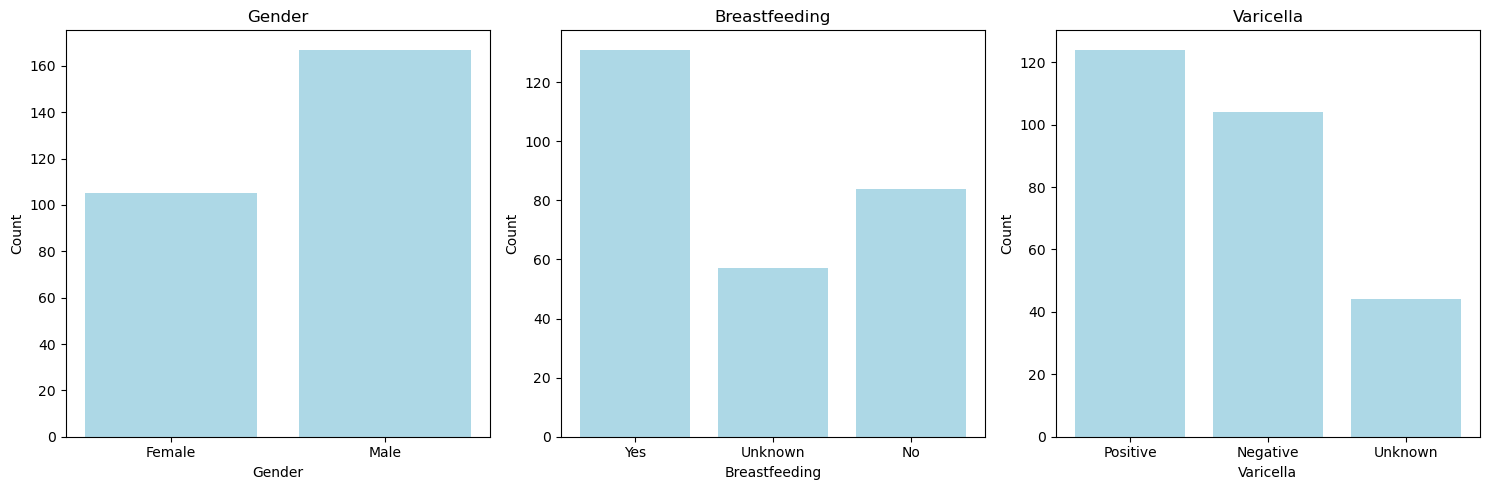

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gender_counts = df['Gender'].value_counts()

bar_color = 'lightblue'

axes[0].bar(gender_counts.index, gender_counts.values,color=bar_color)
axes[0].set_title('Gender')
axes[0].set_xticks(gender_counts.index)
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

breastfeeding_counts = df['Breastfeeding'].value_counts()
axes[1].bar(breastfeeding_counts.index, breastfeeding_counts.values,color=bar_color)
axes[1].set_title('Breastfeeding')
axes[1].set_xticks(breastfeeding_counts.index)
axes[1].set_xticklabels(['Yes', 'No', 'Unknown'])
axes[1].set_xlabel('Breastfeeding')
axes[1].set_ylabel('Count')

varicella_counts = df['Varicella'].value_counts()
axes[2].bar(varicella_counts.index, varicella_counts.values,color=bar_color)
axes[2].set_title('Varicella')
axes[2].set_xticks(varicella_counts.index)
axes[2].set_xticklabels(['Positive', 'Negative', 'Unknown'])
axes[2].set_xlabel('Varicella')
axes[2].set_ylabel('Count')

plt.tight_layout()

plt.show()


**OBSERVATIONS**

**Gender Distribution:**
- There are a total of 272 patients in the dataset.
- Gender-wise, there are more male patients in the data

**Breastfeeding Status Distribution:**
- Most patients have a "Yes" status for breastfeeding, with 130 individuals.
- A significant portion of patients have a positive response to breastfeeding, while a smaller portion answered "No," and some have an "Unknown" status.

**Varicella Status:**
- The majority of patients have a "Positive" varicella status, with 125 individuals.
- Varicella-positive cases are more common in the dataset, followed by varicella-negative cases, with a smaller number having an unknown status.

These inferences provide an initial understanding of the distribution of categorical variables within the dataset.


**2) Count of each intial symptoms type (visual, sensory, motor, etc.) to understand which symptoms are most common among patients.**

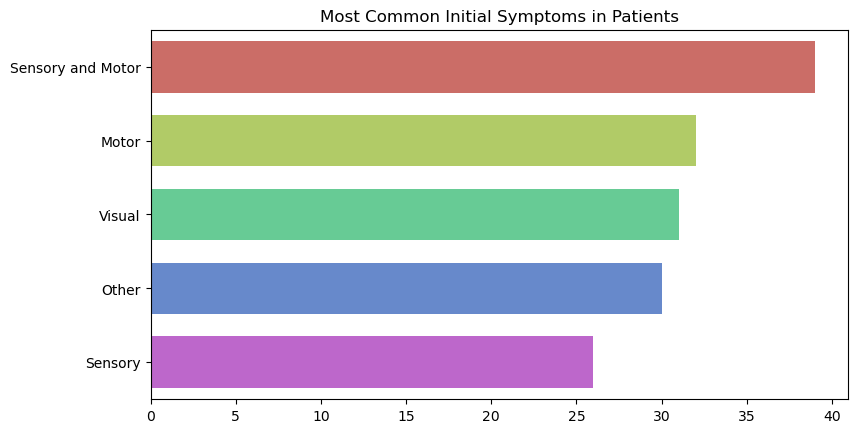

In [29]:
mapping = {
    1: 'Visual',
    2: 'Sensory',
    3: 'Motor',
    4: 'Other',
    5: 'Visual and Sensory',
    6: 'Visual and Motor',
    7: 'Visual and Others',
    8: 'Sensory and Motor',
    9: 'Sensory and Other',
    10: 'Motor and Other',
    11: 'Visual, Sensory, and Motor',
    12: 'Visual, Sensory, and Other',
    13: 'Visual, Motor, and Other',
    14: 'Sensory, Motor, and Other',
    15: 'Visual, Sensory, Motor, and Other'
}

df['Initial_Symptom'] = df['Initial_Symptom'].map(mapping)

top_5 = df['Initial_Symptom'].value_counts().head(5).index

plt.figure(figsize=(9, 4.8))
sns.countplot(data=df, y='Initial_Symptom', palette='hls', order=top_5,width = 0.7)
plt.title('Most Common Initial Symptoms in Patients')
plt.xlabel('')
plt.ylabel('')
plt.show()


**OBSERVATIONS**

**Sensory and Motor:**

- This symptom combination has the highest count in the dataset that suggests that a significant number of patients in the dataset presented with both sensory and motor symptoms as their initial clinical presentation.

**Motor:**

- Motor symptoms, which involve issues with muscle control and movement, are also relatively common among the patients.

**Visual:**

- Visual symptoms can involve issues with vision, such as double vision or visual loss.

The dataset predominantly consists of patients who experienced sensory and motor symptoms, followed by those with motor and visual symptoms.

**3) To understand the if there are gender-related differences in symptom presentation.**